# Chapter 2, gradient descent

## 1. The Input Data: A Grid of Pixels

Our goal is to classify handwritten digits. The data for this task consists of images rendered on a **28x28 pixel grid**. Each pixel has a grayscale value, typically ranging from **0 (black)** to **1 (white)**.

These raw pixel values become the initial input for our network. Since there are $28 \times 28 = 784$ pixels, they will determine the activation of **784 neurons** in the network's first layer.

Let's load a sample digit from the popular MNIST dataset to see what one looks like.

In [ ]:
from utils import get_mnist

x_train, y_train, x_test, y_test = get_mnist()
print("✅ Data loaded successfully!")
print(f"Training images shape: {x_train.shape}")

Done.
Done.
Done.
Done.
✅ Data loaded successfully!
Training images shape: (60000, 28, 28)


## 2. The Network's Architecture

The activation for each neuron is calculated based on the activations from the previous layer. This is done by taking a **weighted sum** of all previous activations, adding a special number called a **bias**, and then passing the result through an "activation function" (like Sigmoid or ReLU).

The formula for a layer's output can be expressed with the following equation:

$$\mathbf{a}_{\text{L}} = f(\mathbf{W}_{\text{L}} \cdot \mathbf{a}_{\text{L-1}} + \mathbf{b}_{\text{L}})$$

Where:
* $\mathbf{a}_{\text{L}}$ is the vector of activations for the current layer (L).
* $f$ is the activation function (e.g., ReLU or Sigmoid).
* $\mathbf{W}_{\text{L}}$ is the weight matrix for the current layer.
* $\mathbf{a}_{\text{L-1}}$ is the vector of activations from the previous layer (L-1).
* $\mathbf{b}_{\text{L}}$ is the bias vector for the current layer.

Our network will have the following structure:
- **Input Layer:** 784 neurons
- **Hidden Layer 1:** 16 neurons
- **Hidden Layer 2:** 16 neurons
- **Output Layer:** 10 neurons (one for each digit, 0-9)

This structure contains thousands of adjustable **weights and biases**. Let's calculate exactly how many.

In [ ]:
# Define the network architecture
n_input = 784
n_hidden1 = 16
n_hidden2 = 16
n_output = 10

# Calculate weights and biases for each connection
# Layer 1 (Input -> Hidden 1)
params_l1 = (n_input * n_hidden1) + n_hidden1

# Layer 2 (Hidden 1 -> Hidden 2)
params_l2 = (n_hidden1 * n_hidden2) + n_hidden2

# Layer 3 (Hidden 2 -> Output)
params_l3 = (n_hidden2 * n_output) + n_output

total_params = params_l1 + params_l2 + params_l3

print(f"Parameters for Input -> Hidden 1: {params_l1}")
print(f"Parameters for Hidden 1 -> Hidden 2: {params_l2}")
print(f"Parameters for Hidden 2 -> Output: {params_l3}")
print("-" * 40)
print(f"Total Adjustable Parameters in the Network: {total_params}")

## 1. Load and Inspect the Data

First, we'll execute the provided `get_mnist` function. This will download the four dataset files, parse them into NumPy arrays, and return the training and testing sets. We'll then print the shapes of the arrays and visualize a sample to confirm that the data has been loaded correctly.


✅ Data loaded successfully!
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


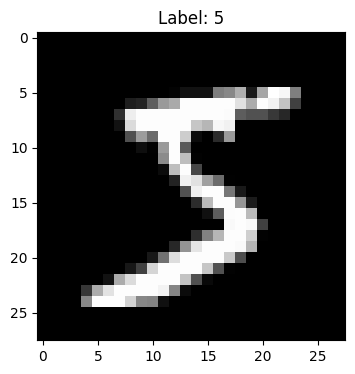

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from utils import get_mnist_corrected

x_train, y_train, x_test, y_test = get_mnist_corrected()

# Print the shapes to verify
print("\n✅ Data loaded successfully!")
print(f"Training images shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing images shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Visualize a sample
plt.figure(figsize=(4, 4))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.grid(False)
plt.show()

## 2. Prepare Data and Build the Classifier

Now that we have the data, we'll prepare it for our model and build a simple **multiclass logistic regression** classifier, just as we did before.

1.  **Flatten Images**: Reshape each 28x28 image into a single 784-element vector.
2.  **Initialize Parameters**: Create the weight `W` and bias `b` matrices with random values.
3.  **Train the Model**: Use a training loop to adjust the weights and biases to minimize the error (loss).

In [11]:
# --- 1. Prepare the Data ---
# Flatten the images from 28x28 to 784. Normalization was already done.
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
print(f"Shape of flattened training data: {x_train_flat.shape}")

# --- 2. Build and Train the Classifier ---
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Initialize Weights and Biases
num_features, num_classes = 784, 10
W = np.random.randn(num_features, num_classes) * 0.01
b = np.zeros((1, num_classes))

# Training Settings
learning_rate = 0.1
iterations = 1000
y_train_one_hot = np.eye(num_classes)[y_train]

# Training Loop
for i in range(iterations):
    # Forward Pass
    scores = x_train_flat @ W + b
    probabilities = softmax(scores)
    
    # Loss Calculation
    loss = -np.mean(np.sum(y_train_one_hot * np.log(probabilities + 1e-9), axis=1))
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")
        
    # Backward Pass (Gradient Calculation)
    d_scores = probabilities - y_train_one_hot
    dW = (x_train_flat.T @ d_scores) / x_train_flat.shape[0]
    db = np.sum(d_scores, axis=0, keepdims=True) / x_train_flat.shape[0]
    
    # Update Parameters
    W -= learning_rate * dW
    b -= learning_rate * db

print("\n✅ Training complete!")

Shape of flattened training data: (60000, 784)
Iteration 0, Loss: 2.3009
Iteration 100, Loss: 0.6096
Iteration 200, Loss: 0.4898
Iteration 300, Loss: 0.4406
Iteration 400, Loss: 0.4123
Iteration 500, Loss: 0.3933
Iteration 600, Loss: 0.3795
Iteration 700, Loss: 0.3688
Iteration 800, Loss: 0.3602
Iteration 900, Loss: 0.3530

✅ Training complete!


## 3. Evaluate the Model

Finally, we'll use the trained weights and biases to make predictions on the **test data** and calculate the final accuracy of our model.

Model Accuracy on Test Data: 91.00%


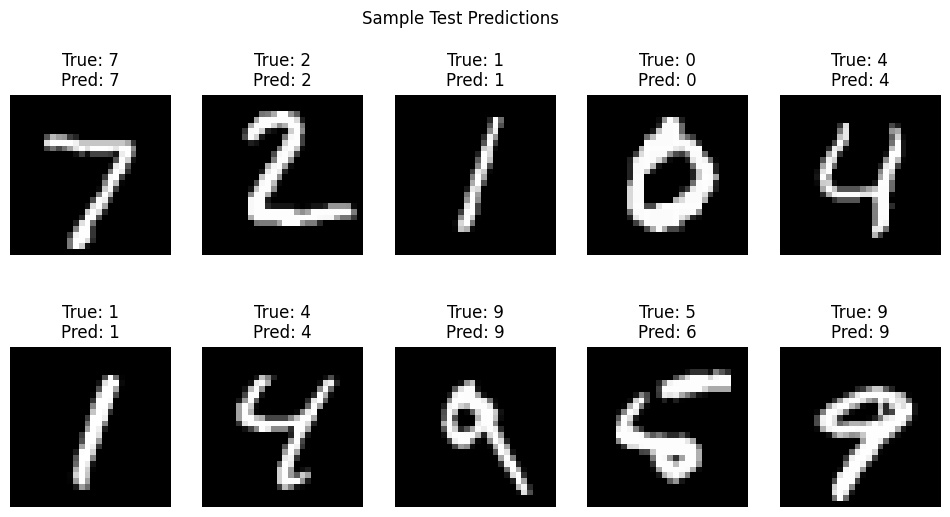

In [12]:
# Make predictions on the test set
test_scores = x_test_flat @ W + b
test_probabilities = softmax(test_scores)
predictions = np.argmax(test_probabilities, axis=1)

# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100
print(f"Model Accuracy on Test Data: {accuracy:.2f}%")

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].set_title(f"True: {y_test[i]}\nPred: {predictions[i]}")
    axes[i].axis('off')
plt.suptitle("Sample Test Predictions")
plt.show()